In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Image Label : 5


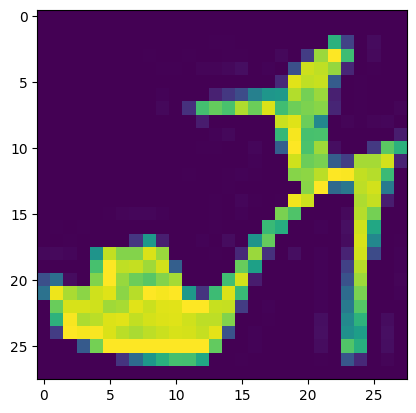

In [2]:
imgIndex = 9
image = xtrain[imgIndex]
print("Image Label :",ytrain[imgIndex])
plt.imshow(image)

In [3]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [5]:
xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30,
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7254 - accuracy: 0.7640 - val_loss: 0.5664 - val_accuracy: 0.8024
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4875 - accuracy: 0.8300 - val_loss: 0.4369 - val_accuracy: 0.8590
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4401 - accuracy: 0.8455 - val_loss: 0.4090 - val_accuracy: 0.8626
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4131 - accuracy: 0.8546 - val_loss: 0.3907 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3931 - accuracy: 0.8610 - val_loss: 0.3790 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3774 - accuracy: 0.8674 - val_loss: 0.3741 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3639 - accuracy: 0.8716 - val_loss: 0.3653 - val_accurac

In [7]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 [==============================] - 0s 92ms/step
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00]
 [0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]
 [7.965445e-12 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]]


In [8]:
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]
